In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales/Black_Friday_sale/sample_submission_V9Inaty.csv
/kaggle/input/black-friday-sales/Black_Friday_sale/train.csv
/kaggle/input/black-friday-sales/Black_Friday_sale/test.csv


In [63]:
# Importing necessary libraries used the file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# importing files to view
black = pd.read_csv('../input/black-friday-sales/Black_Friday_sale/train.csv')
test_file = pd.read_csv('../input/black-friday-sales/Black_Friday_sale/test.csv')

# looking and analysing the data using pandas

In [7]:
# Looking at the first 5 rows of black df
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
# looking at the rows of the test file
test_file.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
# Looking at column null values and their data types
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# grouping by the product id's purchase amount(mean purchase)
black.groupby(['Product_ID'])['Purchase'].mean().sort_values(ascending=False)

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
                 ...     
P00372445      374.930705
P00375436      374.266585
P00371644      362.911012
P00370853       37.393643
P00370293       36.675159
Name: Purchase, Length: 3631, dtype: float64

In [12]:
# grouping by marital status and their purchase
black.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [13]:
# grouping by product category 1 and their purchase
black.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False)

Product_Category_1
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

In [14]:
# grouping by product category 2 and their purchase

black.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False)

Product_Category_2
10.0    15648.729543
2.0     13619.356401
6.0     11503.551379
3.0     11235.359570
15.0    10357.077691
16.0    10295.681933
8.0     10273.259518
4.0     10215.192001
13.0     9683.352388
17.0     9421.576577
18.0     9352.440433
5.0      9027.821574
11.0     8940.580515
9.0      7277.006851
14.0     7105.264916
12.0     6975.472504
7.0      6884.683706
Name: Purchase, dtype: float64

In [15]:
# grouping by product category 3 and their purchase
black.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False)

Product_Category_3
3.0     13939.696574
10.0    13505.813441
6.0     13194.311043
13.0    13185.118703
8.0     13024.918882
15.0    12339.369900
5.0     12117.786889
11.0    12091.437673
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
9.0     10431.697210
14.0    10052.594530
4.0      9794.386667
12.0     8715.512762
Name: Purchase, dtype: float64

In [16]:
# grouping by age and look their purchase
black.groupby('Age')['Purchase'].mean().sort_values(ascending=False)

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

In [17]:
# group by their city category and look their purchase
black.groupby('City_Category')['Purchase'].mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

In [18]:
# grouping by gender and looking at purchase
black.groupby('Gender')['Purchase'].mean().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

In [20]:
# grouping by occupation and looking at purchase
black.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

In [36]:
# Grouping by stay in city and looking at purchase
black.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending=False)

Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

In [21]:
# Counting frequency of product id
black.groupby(['Product_ID'])['Product_ID'].count()

Product_ID
P00000142    1152
P00000242     376
P00000342     244
P00000442      92
P00000542     149
             ... 
P0099442      200
P0099642       13
P0099742      126
P0099842      102
P0099942       14
Name: Product_ID, Length: 3631, dtype: int64

In [23]:
# Creating a feature showing count of product id frequency
black['Prod_ID_Freq'] = black.groupby('Product_ID')['Product_ID'].transform('count')
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,227
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,581
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,102
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,341
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,203


# EDA

Text(0.5, 1.0, 'Product Category 1 Vs Purchase')

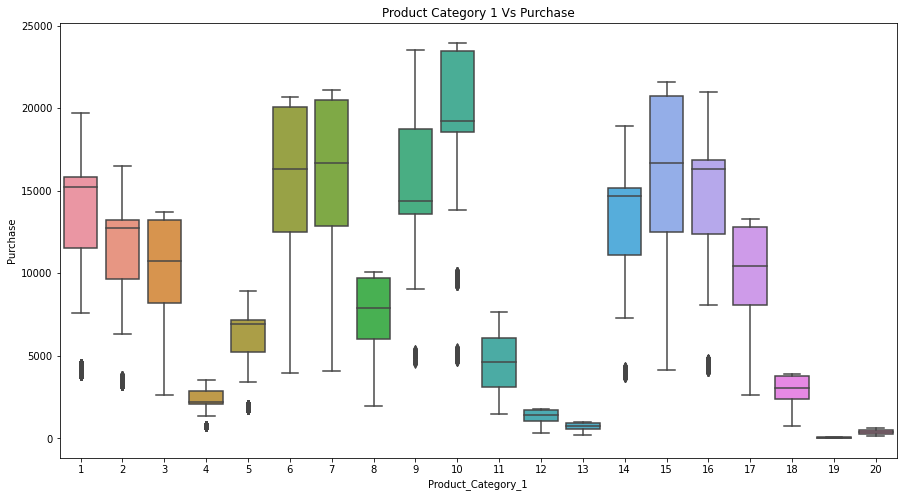

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Product_Category_1', y='Purchase', data=black)
plt.title("Product Category 1 Vs Purchase")

Text(0.5, 1.0, 'Product Category 2 Vs Purchase')

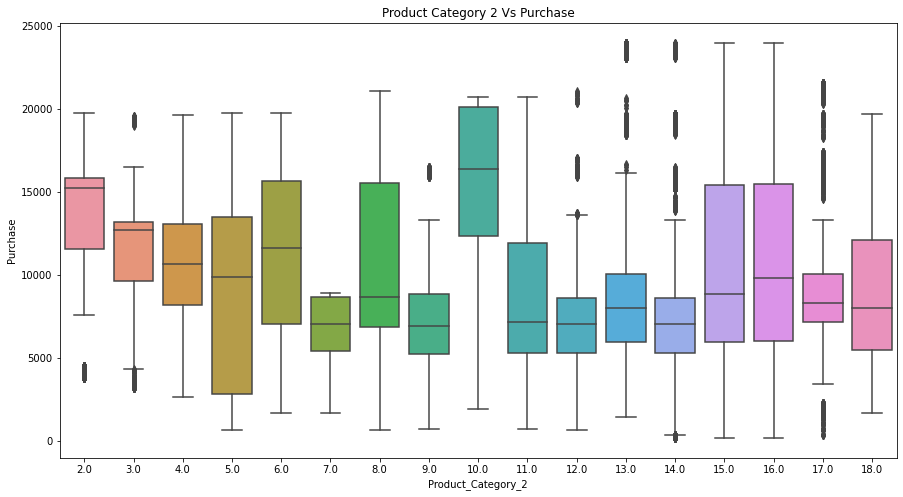

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Product_Category_2', y='Purchase', data=black)
plt.title("Product Category 2 Vs Purchase")

Text(0.5, 1.0, 'Product Category 3 Vs Purchase')

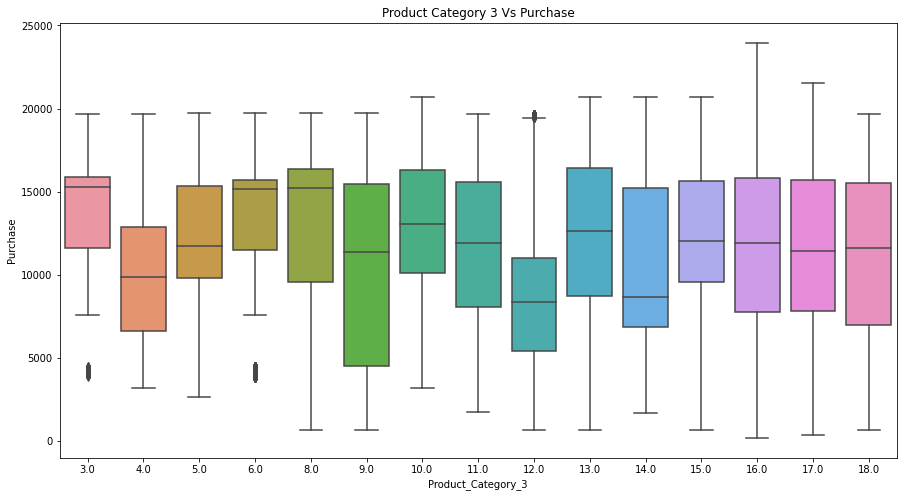

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Product_Category_3', y='Purchase', data=black)
plt.title("Product Category 3 Vs Purchase")

Text(0.5, 1.0, 'Age Wise Purchase')

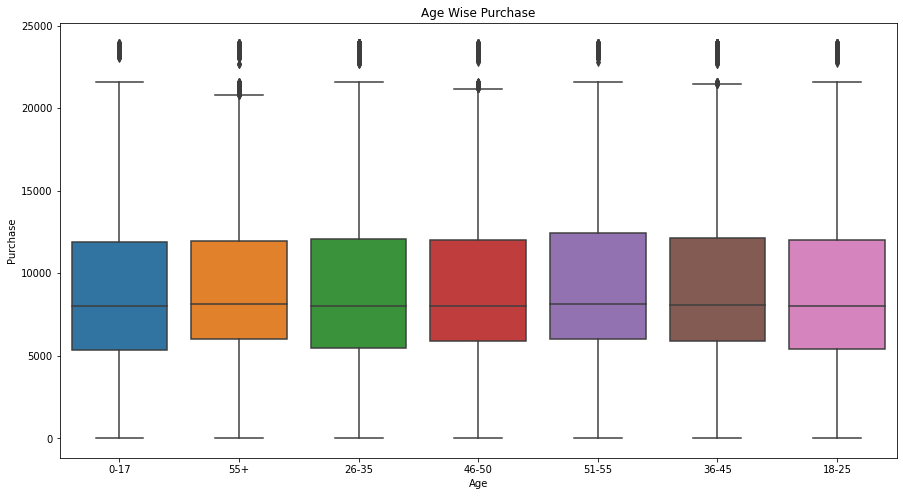

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Age', y='Purchase', data=black)
plt.title("Age Wise Purchase")

Text(0.5, 1.0, 'Marital Status VS Purchase')

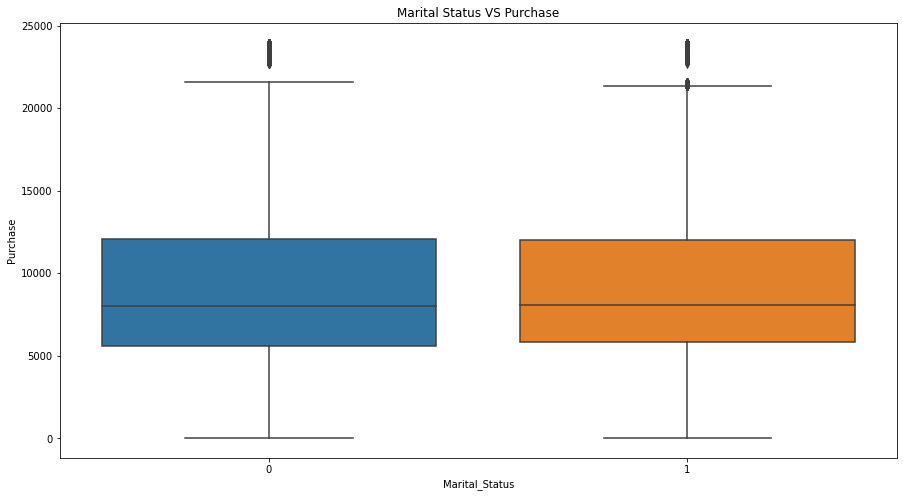

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Marital_Status', y='Purchase', data=black)
plt.title('Marital Status VS Purchase')

Text(0.5, 1.0, 'City Category VS Purchase')

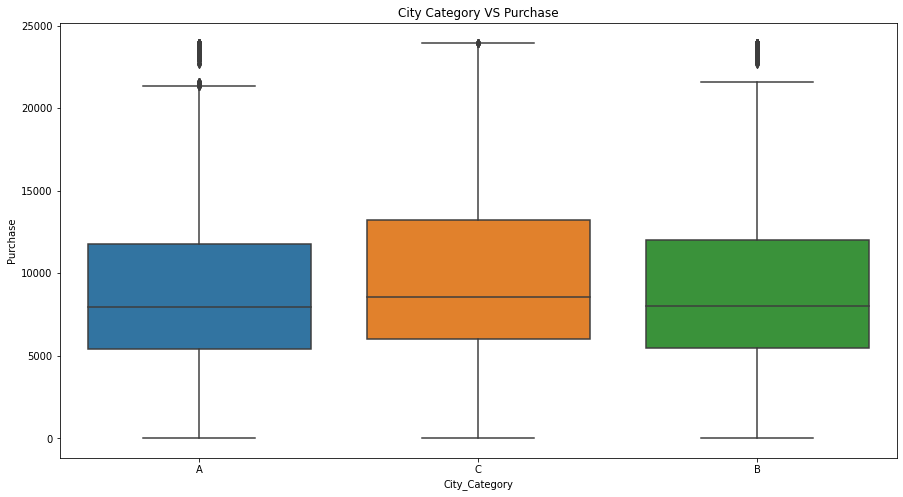

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x='City_Category', y='Purchase', data=black)
plt.title('City Category VS Purchase')

Text(0.5, 1.0, 'Gender VS Purchase')

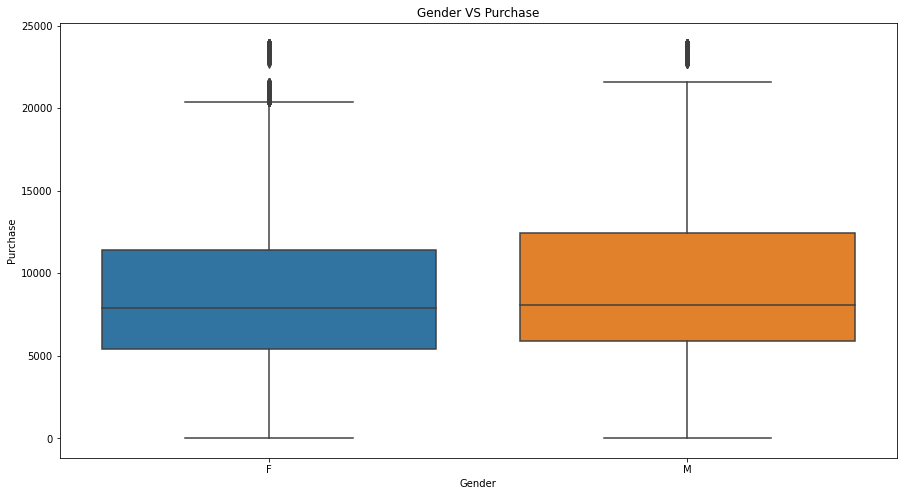

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Gender', y='Purchase', data=black)
plt.title('Gender VS Purchase')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

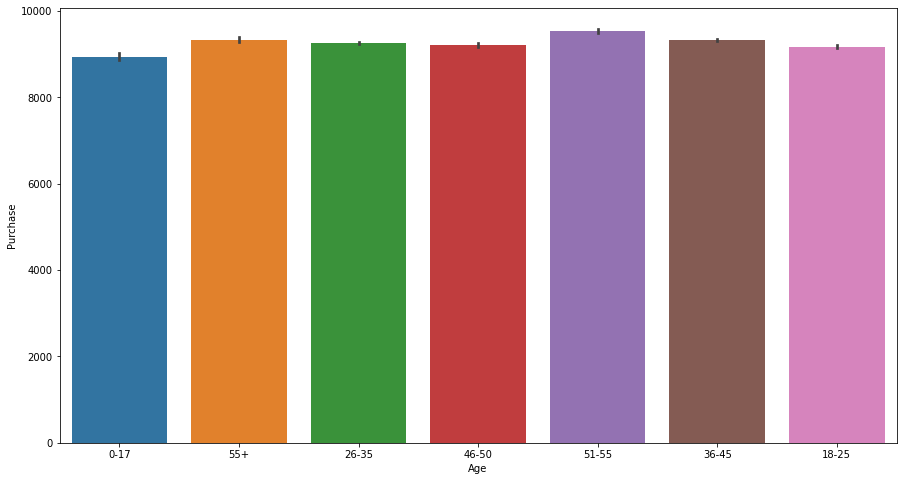

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='Purchase', data=black)

Text(0.5, 1.0, 'Occupation VS Purchase')

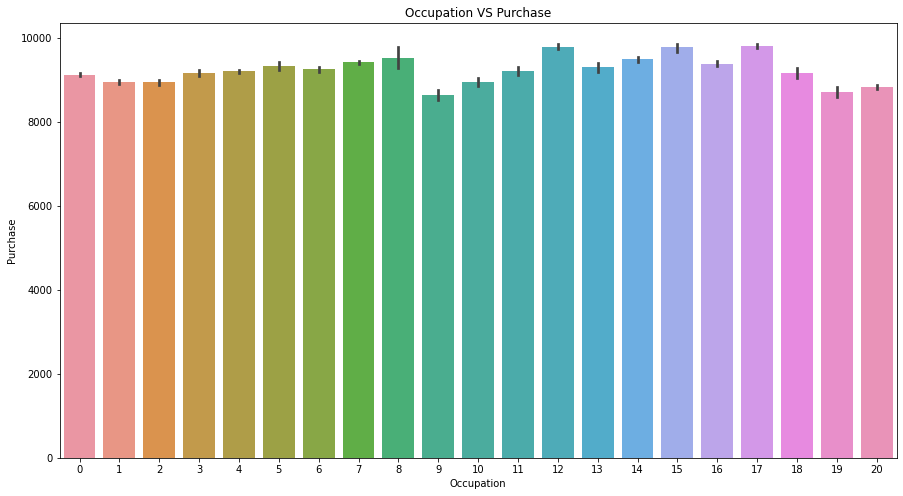

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x='Occupation', y='Purchase', data=black)
plt.title('Occupation VS Purchase')

Text(0.5, 1.0, 'Stay_In_Current_City_Years     VS    Purchase')

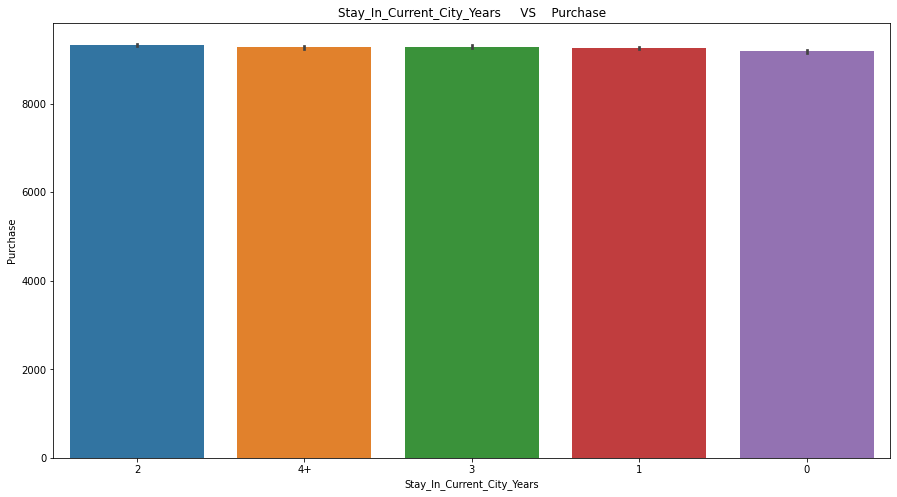

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=black)
plt.title('Stay_In_Current_City_Years     VS    Purchase')

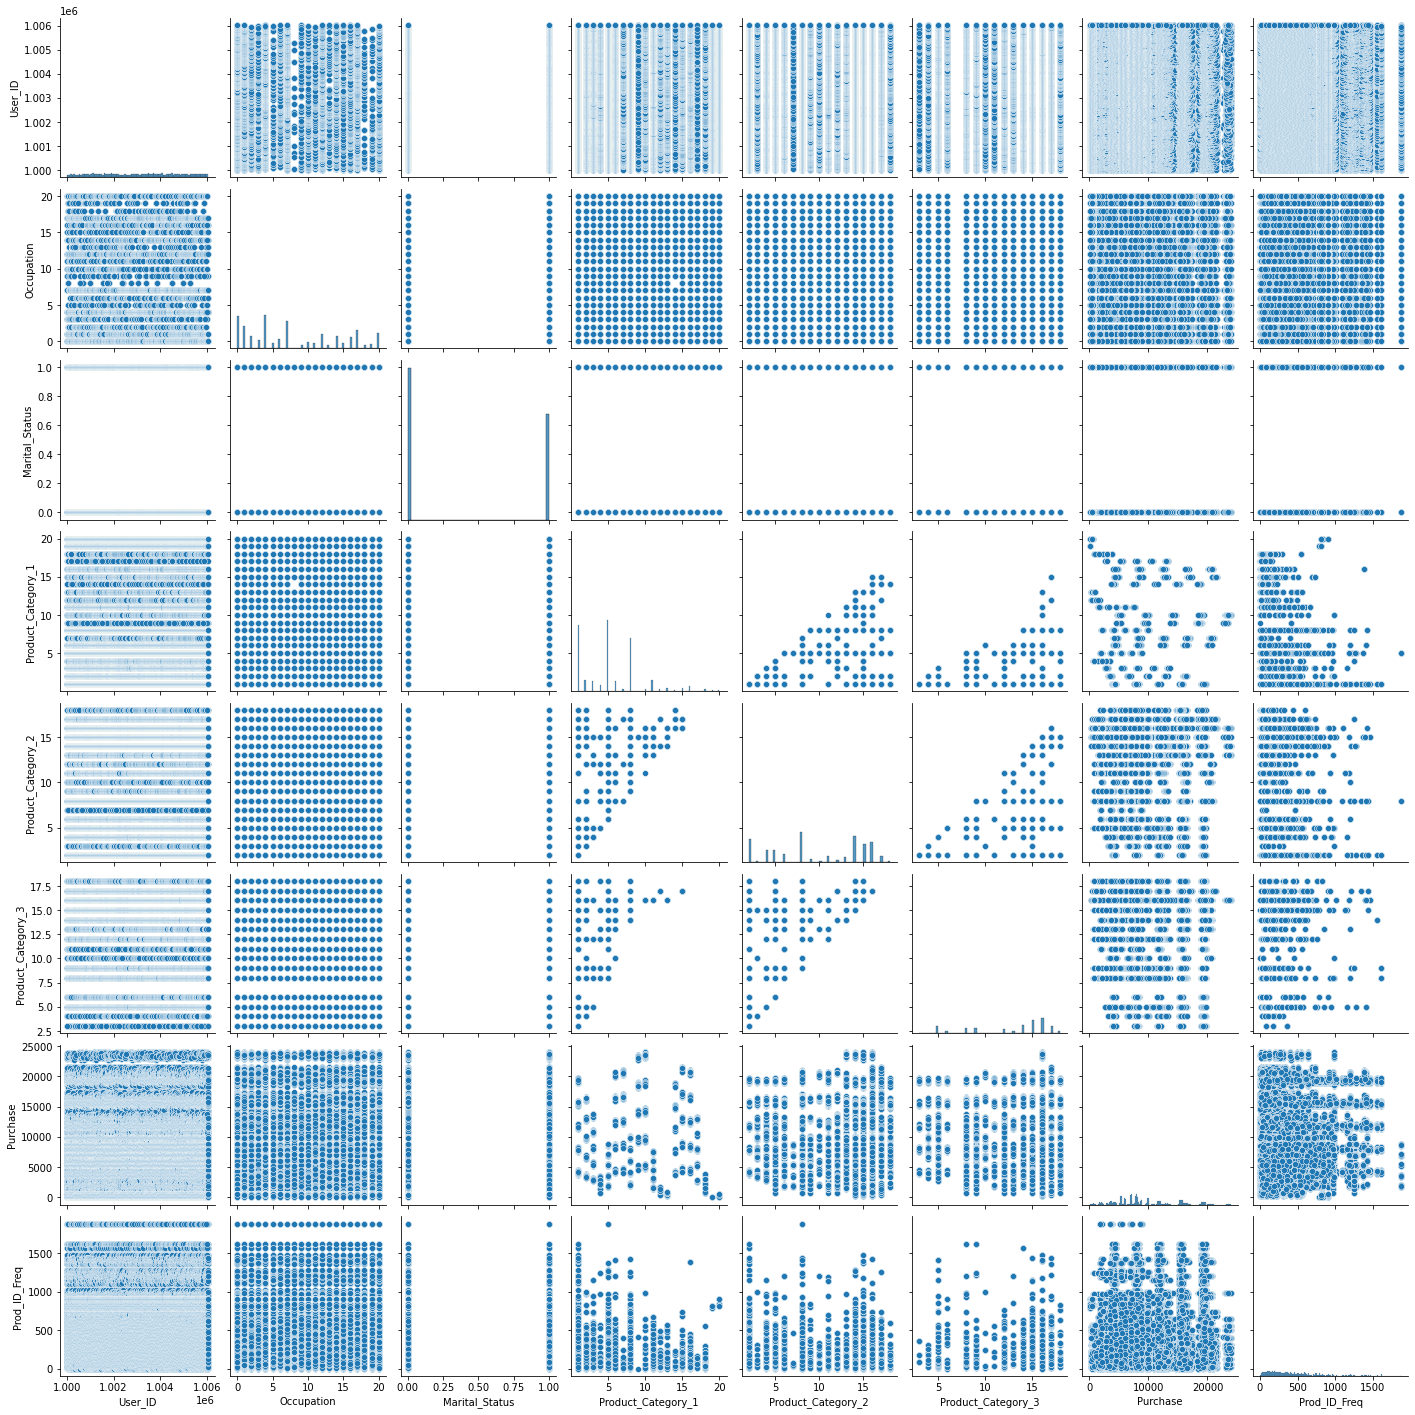

In [38]:
# plotting each feature against others using pairplot
sns.pairplot(black)

<AxesSubplot:>

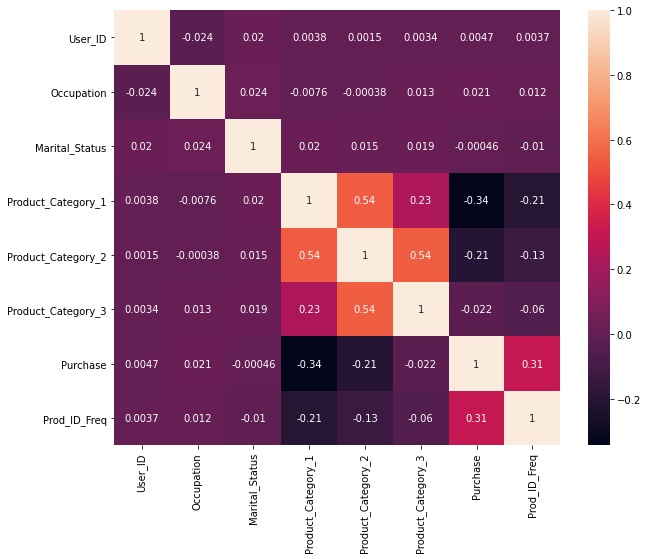

In [40]:
# Check the correlation and produce heatmap
corr = black.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

# preprocessing

In [41]:
black['Age'] = black['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
black['Gender'] = black['Gender'].map({'F': 0, 'M': 1})

In [42]:
city = pd.get_dummies(black['City_Category'],drop_first=True)
city.rename(columns = {'B': 'cityB', 'C': 'cityC'}, inplace=True)
black = pd.concat([black, city], axis=1)

In [43]:
black['Stay_In_Current_City_Years'] = black['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
black = black.drop('City_Category', axis=1)
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq,cityB,cityC
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370,227,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,581,0,0
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422,102,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057,341,0,0
4,1000002,P00285442,1,7,16,4,0,8,NaN,NaN,7969,203,0,1


In [44]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Prod_ID_Freq                550068 non-null  int64  
 12  cityB                       550068 non-null  uint8  
 13  cityC         

In [45]:
# Checking % of missing values
print((black.isnull().sum()/len(black.index))*100)


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Prod_ID_Freq                   0.000000
cityB                          0.000000
cityC                          0.000000
dtype: float64


In [47]:
# imputing with value 0, it won't affect the model 
# Model will ignore these zeros while fitting

black['Product_Category_3'] = black['Product_Category_3'].fillna(0)
black['Product_Category_2'] = black['Product_Category_2'].fillna(0)

In [48]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Prod_ID_Freq                550068 non-null  int64  
 12  cityB                       550068 non-null  uint8  
 13  cityC         

# Model selection

In [52]:
#  Dropping unnecessary columns
black = black.drop(['User_ID', 'Product_ID'], axis=1)

In [53]:
# dividing it into train and test
black_train, black_test = train_test_split(black, test_size=0.3, random_state=100)

In [54]:
# Looking at their shapes
black_train.shape, black_test.shape

((385047, 12), (165021, 12))

In [55]:
black_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq,cityB,cityC
495840,1,2,20,4,0,11,0.0,0.0,4444,77,0,1
366955,1,5,5,0,0,5,15.0,0.0,5385,549,1,0
267012,1,3,0,3,1,5,8.0,0.0,3523,307,0,0
516764,1,4,7,1,1,1,15.0,16.0,15667,351,1,0
358915,1,1,10,1,0,6,8.0,16.0,20680,1406,0,1


In [57]:
# Using minmaxscaler to bring values in range 0-1(Chosen numeric columns excluding traget column)
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
num_variable = ['Age', 'Occupation','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Prod_ID_Freq']
black_train[num_variable]= scale.fit_transform(black_train[num_variable])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [58]:
black_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod_ID_Freq,cityB,cityC
495840,1,0.166667,1.00,1.00,0,0.526316,0.000000,0.000000,4444,0.040447,0,1
366955,1,0.666667,0.25,0.00,0,0.210526,0.833333,0.000000,5385,0.291644,1,0
267012,1,0.333333,0.00,0.75,1,0.210526,0.444444,0.000000,3523,0.162853,0,0
516764,1,0.500000,0.35,0.25,1,0.000000,0.833333,0.888889,15667,0.186269,1,0
358915,1,0.000000,0.50,0.25,0,0.263158,0.444444,0.888889,20680,0.747738,0,1


In [59]:
# dividing further into Xtrain and ytrain
y_train = black_train['Purchase']
X_train = black_train.drop('Purchase', axis=1)

# Using Statsmodel

In [60]:
# Adding constant 1 as a column for statsmodel
X_train_sm = sm.add_constant(X_train)
LR = sm.OLS(y_train, X_train_sm)
LR_model = LR.fit()

In [61]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     8550.
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:20:36   Log-Likelihood:            -3.7854e+06
No. Observations:              385047   AIC:                         7.571e+06
Df Residuals:                  385035   BIC:                         7.571e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8055.5502     30.074    267.860      0.000    7996.607    8114.494
Gender                       446.1823     16.964     26.302      0.000     412.934     479.431
Age                          781.0253     34.245     22.807      0.000     713.906     848.145
Occupation                    68.7094     22.512      3.052      0.002      24.587     112.832
Stay_In_Current_City_Years    58.5132     22.512      2.599      0.009      14.391     102.636
Marital_Status               -52.2332     15.520     -3.366      0.001     -82.652     -21.815
Product_Category_1         -6024.9486     38.327   -157.197      0.000   -6100.069   -5949.828
Product_Category_2            18.6456     21.175      0.881      0.379     -22.857      60.148
Product_Category_3          1930.4006     23.176     83.293      0.000    1884.976    1975.825
Prod_ID_Freq                5679.4879     39.519    143.715      0.000    5602.032    5756.944
cityB                         85.9136     17.967      4.782      0.000      50.700     121.127
cityC                        336.5575     19.389     17.358      0.000     298.555     374.560
==============================================================================
Omnibus:                    39853.289   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55952.720
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       3.887   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Checking VIF score so that if any feature score is > 5, we can drop it to improve our model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,Age,4.44
0,Gender,3.46
3,Stay_In_Current_City_Years,2.74
8,Prod_ID_Freq,2.58
2,Occupation,2.50
5,Product_Category_1,2.30
9,cityB,2.30
6,Product_Category_2,2.09
10,cityC,2.09
4,Marital_Status,1.87


In [65]:
# predicting on Xtrain and printing first 10 score
y_pred_train = LR_model.predict(X_train_sm)
y_pred_train[:10]

495840     6154.376427
366955     9529.026123
267012     8418.521925
516764    11753.965908
358915    13272.728624
453633    11498.737781
425766     6996.260816
408505     8962.273825
52513      6244.074525
110160     9163.865444
dtype: float64

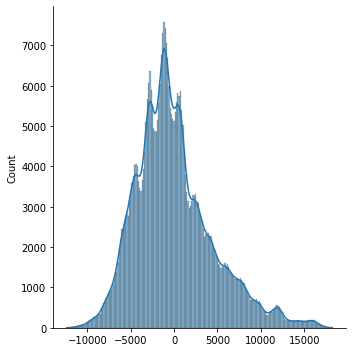

In [66]:
# residual plot for train set
res = y_train - y_pred_train
sns.displot(res, kde=True)

In [73]:
# Looking at X test before scaling
X_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Prod_ID_Freq,cityB,cityC
343184,1,4,0,1,1,11,0.0,0.0,182,0,0
544675,0,4,7,4,1,3,4.0,5.0,735,0,0
433588,0,3,3,1,0,5,13.0,16.0,375,1,0
123193,1,1,10,1,0,4,5.0,0.0,136,0,1
161124,1,3,15,2,1,1,15.0,16.0,317,0,0
...,...,...,...,...,...,...,...,...,...,...,...
175087,0,3,3,1,1,5,0.0,0.0,200,1,0
444144,1,5,12,3,1,1,15.0,16.0,1015,1,0
306677,1,2,4,4,0,1,5.0,15.0,566,1,0
326433,0,1,10,2,0,15,16.0,0.0,303,0,1


In [74]:
# scaling test data 30%
# Scaling test dataset(Only transform it as you have done fit on train already)
black_test[num_variable]= scale.transform(black_test[num_variable])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [78]:
# applying on 30% test set
y_test = black_test['Purchase']
X_test = black_test.drop('Purchase', axis=1)

In [79]:
# Adding constant for Xtest and predicting
X_test_sm = sm.add_constant(X_test)
y_test_pred = LR_model.predict(X_test_sm)

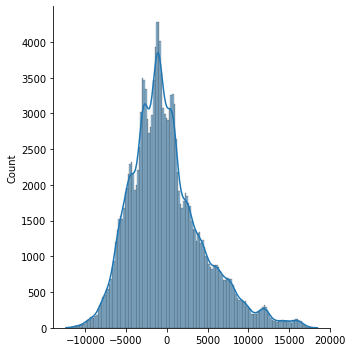

In [81]:
# Residual plot for test data
res = y_test - y_test_pred
sns.displot(res, kde=True)

In [82]:
# Checking r2_score and using mean squared error for root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_true=y_test, y_pred=y_test_pred)

0.19499949501986413

In [83]:
# Root mean squared error on test data
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse

4512.180568332246

# Using Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=100)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=100)

In [89]:
# root mean squared error in case of train data
rmse_rfr = np.sqrt(mean_squared_error(y_train, rfr.predict(X_train)))
rmse_rfr

3675.77425690752

In [90]:
# rmse in case of test data 30%
rmse_rfr = np.sqrt(mean_squared_error(y_test, rfr.predict(X_test)))
rmse_rfr

3697.03003654636

# Using XG Boost

In [91]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
# rmse on train data
rmse_xg = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse_xg

2612.228138096185

In [93]:
# rmse on test data
rmse_xg = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse_xg

2665.3076342055006

<h3>We got fine result with xgboost method. We can keep this model for final test data.</h3>

# Here you go, we finish with train data given for black sales regression problem. You can do same methods to prepare final test data given for this problem. You can do that as a task. I'm adding link to download dataset from analytics vidya.
<a href="https://datahack.analyticsvidhya.com/contest/black-friday/#DiscussTab">Click here to register and get dataset</a>
